## Logistic Regression (Binary Classification) : in this regression there are 2 dependent variables outcome ie Yes or No, Pass or Fail etc etc

In [2]:
# EXAMPLE 1
# This is a simple example of how to use Logistic Regression Binary Classificationple with data in excel
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Step 1: get your data from excel file and assign it to a pandas variable
df = pd.read_csv("C:\Python\My Files\insurance_Data.csv")
print(df.head())

   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1


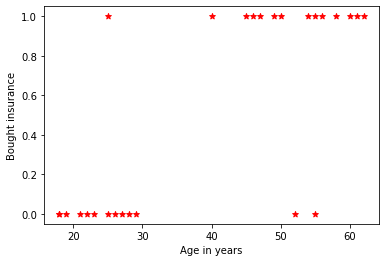

In [3]:
# Step 2: Let's do a quick scatter plot to get an idea of the shape of the data. 
# from the scattered graph, most people under the age of 30 years are less likely to have an insurance
plt.xlabel('Age in years')
plt.ylabel('Bought insurance')
plt.scatter(df.age,df.bought_insurance, color = 'red', marker= '*')

In [4]:
# Step 3: train and fit your model to use available datasets.

x_train, x_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.2, random_state=0) #  Note that your independent argument is a 2d array
reg = LogisticRegression() # get logistic regression object
reg.fit(x_train,y_train) # fit your logistic regression model. 

LogisticRegression()

In [5]:
# Step 4 : let's get the predictions. 
y_predict = reg.predict(x_test)
print(x_test)
print(y_predict)

# the print results shows that age 47,50,49,58,56 are likely to have insurance while age 28 is less likely to have an insurance.


    age
2    47
24   50
14   49
17   58
5    56
11   28
[1 1 1 1 1 0]


In [6]:

#Step 5:
# It is important to know how the relationship between the values of the x-axis and the values of the y-axis is, if there are 
# no relationship the linear regression can not be used to predict anything. The r-squared value ranges from 0 to 1, where 0 means no relationship, 
# and 1 means 100% related.
r2 = reg.score(x_test,y_test)
mse = mean_squared_error(x_test,y_predict)
gradient = reg.coef_ # this gives you the gradient or slope
intercept = reg.intercept_ # this gives you the intercept on the y axix.

print(r2)
print(mse)
print(gradient)
print(intercept)

1.0
2313.1666666666665
[[0.11216016]]
[-4.60960684]


## Logistic Regression (Binary Classification) : This is a real world example of Logistic Regression Binary Classification using HR data.

In [29]:
# In this example, we need to determine which columns are relevant in regards to whether an employee stay in the company or leave.These relevant columns will
# make up your independent x variables while column "left" will be your dependent y column.

# Step 1: 
import numpy as np
import pandas as pd
import pyodbc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Step 1: get your data from SQL Server and assign it to a pandas variable
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=LAPTOP-CHKIB79A;''Database=Tutorial;''Trusted_Connection=yes;')
query_str = " SELECT  [satisfaction_level],[last_evaluation],[number_project],[average_montly_hours],[time_spend_company],[Work_accident],[left],\
  [promotion_last_5years],[Department],[salary]\
  FROM [Tutorial].[dbo].[HR_DataActual] ORDER BY salary" 
df = pd.read_sql(sql=query_str, con=conn_str)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.45,0.49,2.0,149.0,3,0.0,1,0.0,product_mng,high
1,0.09,0.85,6.0,289.0,4,0.0,1,0.0,hr,high
2,0.44,0.51,2.0,156.0,3,0.0,1,0.0,technical,high
3,0.45,0.53,2.0,129.0,3,0.0,1,0.0,technical,high
4,0.37,0.46,2.0,149.0,3,0.0,1,0.0,marketing,high


In [8]:
# Step 2: Since there are so many independent variables for x, let's determine the relevant columns needed by comparing the average value of employees 
# that left with the average value of the employee retained for each numerical columns

# from the result below, we can conclude that the relevants columns are

# satisfaction_level : More employees will stay if the satisfaction level is high ie 0.666810
# average_montly_hours: More employees will leave if they are spending more hours at work 
# promotion_last_5years: The more promotions in the last 5 years, the more an employee is likely to stay.
# Lastly, you might argue that Work_accident should be included but it makes no sense to conclude that thge more an employee have an accident at work,
# the more likely he or she will stay. It makes no sense. Hence, I will exclude this column from my relevant independent x columns

averages = df.groupby(df.left).mean()
averages

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


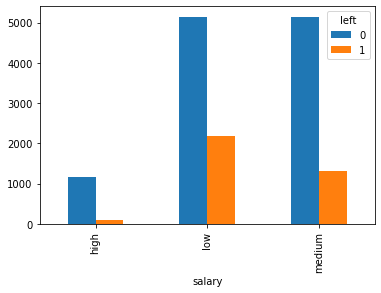

In [9]:
# Step 3. Since Department and Salary are textual and exluded from the step above, we need a visual view to see if these 2 columns are relevant.

# Let's get a bar chat to display Salary. from the Salary bar chat, we can conclude that the more the salary, the less likely an employee will leave.
# Hence, salary column is also relevant. Also, for the same number of employees retained for low and medium salary, more low paid workers left the company.


pd.crosstab(df.salary,df.left).plot(kind='bar')

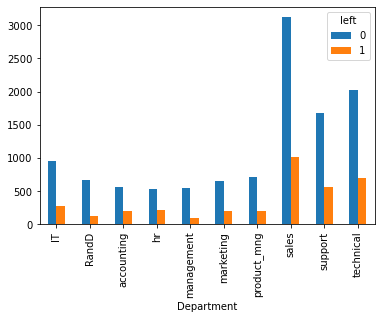

In [10]:
# Let's get a bar chat to display Department. from the Department bar chat, we can conclude that Department have no effect on employee retainability

pd.crosstab(df.Department,df.left).plot(kind='bar')

In [33]:
# Step 4: Let's get dummies for salary column and merge all columns with these dummies

dummies = pd.get_dummies(df.salary)
print(dummies.head())


# merge the dataset using pandas function namely concat that takes in Lists arguments and specify axis as columns
merged = pd.concat([df,dummies], axis = 'columns')
print(merged.head())


   high  low  medium
0     1    0       0
1     1    0       0
2     1    0       0
3     1    0       0
4     1    0       0
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.45             0.49             2.0                 149.0   
1                0.09             0.85             6.0                 289.0   
2                0.44             0.51             2.0                 156.0   
3                0.45             0.53             2.0                 129.0   
4                0.37             0.46             2.0                 149.0   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3            0.0     1                    0.0   
1                   4            0.0     1                    0.0   
2                   3            0.0     1                    0.0   
3                   3            0.0     1                    0.0   
4                   3            0.0     1      

In [34]:
# Step 5 : let's drop all the irrelevant columns including one column from the dummies column

# get columns for x
x = merged.drop(['last_evaluation', 'number_project' , 'time_spend_company' , 'Work_accident' , 'left' , 'Department' ,'salary', 'medium'], axis = 'columns')
print(x.head())

# use left column for y
y = df.left
print(y.head())

   satisfaction_level  average_montly_hours  promotion_last_5years  high  low
0                0.45                 149.0                    0.0     1    0
1                0.09                 289.0                    0.0     1    0
2                0.44                 156.0                    0.0     1    0
3                0.45                 129.0                    0.0     1    0
4                0.37                 149.0                    0.0     1    0
0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64


In [13]:
# Step 6: train and fit your model to use available datasets.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 
reg = LogisticRegression() # get logistic regression object
reg.fit(x_train,y_train) # fit your logistic regression model. 

LogisticRegression()

In [14]:
# let's make some prediction and check accuracy of the model

y_predict = reg.predict(x_test)
print("The predictions are :",y_predict)

test_predict = reg.predict([[0.9,300, 0,0,0]])
print("The prediction for 0.9 satisfaction_level, 300 average_montly_hours, no promotion last 5 years and a medium salary is :"  ,test_predict)
r2 = reg.score(x_test,y_test)
print("The accuracy of the model is :" ,r2)

The predictions are : [0 0 0 ... 1 0 0]
The prediction for 0.9 satisfaction_level, 300 average_montly_hours, no promotion last 5 years and a medium salary is : [0]
The accuracy of the model is : 0.7777777777777778


## Step 7 : Finally, the interesting part. Let's get the sql table and predict whether an employee left or stay based on the various independent variables

In [15]:
# let's connect to the prediction table with column "left" blank
query_str1 = " SELECT  [satisfaction_level],[last_evaluation],[number_project],[average_montly_hours],[time_spend_company],[Work_accident],[left],\
  [promotion_last_5years],[Department],[salary]\
  FROM [Tutorial].[dbo].[HR_DataPrediction] ORDER BY salary" 
df1 = pd.read_sql(sql=query_str1, con=conn_str)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.0,0.53,2.0,456.399,3,0.0,None,0.0,sales,high
1,0.0,0.52,2.0,462.213,3,0.0,None,0.0,sales,high
2,0.0,0.50,2.0,444.771,3,0.0,None,0.0,sales,high
3,0.0,0.55,2.0,430.236,3,0.0,None,0.0,sales,high
4,0.0,0.56,2.0,398.259,3,0.0,None,0.0,sales,high


In [16]:
# Let's get the dummies variables for salary
dummies1 = pd.get_dummies(df1.salary)
#  As a rule, always drop one of the dummies. Let's drop medium
dummies1 = dummies1.drop('medium', axis = 'columns')
dummies1.head()

,high,low
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [17]:
# Let's get all the relevant columns for x
# get columns for x
x_dropped = df1.drop(['last_evaluation', 'number_project' , 'time_spend_company' , 'Work_accident' , 'left' , 'Department', 'salary'], axis = 'columns')
x_dropped.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years
0,0.0,456.399,0.0
1,0.0,462.213,0.0
2,0.0,444.771,0.0
3,0.0,430.236,0.0
4,0.0,398.259,0.0


In [18]:
# Now let's merge dummies1 and x_dropped to get our final x

x = pd.concat([x_dropped,dummies1], axis = 'columns')
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.0,456.399,0.0,1,0
1,0.0,462.213,0.0,1,0
2,0.0,444.771,0.0,1,0
3,0.0,430.236,0.0,1,0
4,0.0,398.259,0.0,1,0


In [19]:
# Let's make prediction for blank column "left" in our prediction table and store the information in variable left
left = reg.predict(x)
left

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [20]:
# let's add all relevant columns to x so that we will end up with exactly the same columns as our predictive table

# Add variable "left" that holds our prediction
x['left'] = left
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,left
0,0.0,456.399,0.0,1,0,0
1,0.0,462.213,0.0,1,0,0
2,0.0,444.771,0.0,1,0,0
3,0.0,430.236,0.0,1,0,0
4,0.0,398.259,0.0,1,0,0


In [21]:
# add other dropped columns
dropped_columns = df1.drop(['satisfaction_level', 'average_montly_hours' , 'promotion_last_5years' , 'left' ], axis = 'columns')
dropped_columns.head()

,last_evaluation,number_project,time_spend_company,Work_accident,Department,salary
0,0.53,2.0,3,0.0,sales,high
1,0.52,2.0,3,0.0,sales,high
2,0.50,2.0,3,0.0,sales,high
3,0.55,2.0,3,0.0,sales,high
4,0.56,2.0,3,0.0,sales,high


In [22]:
final_x = pd.concat([x,dropped_columns], axis = 'columns')
final_x.head()
# take a look to see that salary column matches our dummies value

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,left,last_evaluation,number_project,time_spend_company,Work_accident,Department,salary
0,0.0,456.399,0.0,1,0,0,0.53,2.0,3,0.0,sales,high
1,0.0,462.213,0.0,1,0,0,0.52,2.0,3,0.0,sales,high
2,0.0,444.771,0.0,1,0,0,0.50,2.0,3,0.0,sales,high
3,0.0,430.236,0.0,1,0,0,0.55,2.0,3,0.0,sales,high
4,0.0,398.259,0.0,1,0,0,0.56,2.0,3,0.0,sales,high


In [23]:
# Let's add a Status column of value Predicted so that we can differential between actual and predicted tables
final_x['Status'] = "Predicted"
final_x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,left,last_evaluation,number_project,time_spend_company,Work_accident,Department,salary,Status
0,0.0,456.399,0.0,1,0,0,0.53,2.0,3,0.0,sales,high,Predicted
1,0.0,462.213,0.0,1,0,0,0.52,2.0,3,0.0,sales,high,Predicted
2,0.0,444.771,0.0,1,0,0,0.50,2.0,3,0.0,sales,high,Predicted
3,0.0,430.236,0.0,1,0,0,0.55,2.0,3,0.0,sales,high,Predicted
4,0.0,398.259,0.0,1,0,0,0.56,2.0,3,0.0,sales,high,Predicted


In [24]:
# lastly, insert predicted table into TimeSpeed table
cursor = conn_str.cursor()
cursor.execute("EXEC [LoadHR_Data]") # truncate table and only load it with actual data.
for i, row in final_x.iterrows():
 cursor.execute("INSERT INTO [Tutorial].[dbo].[HR_Data]([satisfaction_level],[last_evaluation],[number_project],[average_montly_hours], \
 [time_spend_company],[Work_accident], [left],[promotion_last_5years], [Department],[salary], [Status]) values(?,?,?,?,?,?,?,?,?,?,?)", 
 row['satisfaction_level'],row['last_evaluation'],row['number_project'],row['average_montly_hours'], row['time_spend_company'],row['Work_accident'],\
 row['left'],row['promotion_last_5years'], row['Department'],row['salary'], row['Status']) 
conn_str.commit()
cursor.close()
conn_str.close()